#Import modules

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

#Load the Dataset

In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/MACHINE LEARNING (TH)/speech-emotion-recognition-ravdess-data.1'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())

print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
len(paths)

5600

In [ ]:
paths[:5]

['/content/drive/MyDrive/MACHINE LEARNING (TH)/speech-emotion-recognition-ravdess-data.1/TESS Toronto emotional speech set data/OAF_Sad/OAF_match_sad.wav',
 '/content/drive/MyDrive/MACHINE LEARNING (TH)/speech-emotion-recognition-ravdess-data.1/TESS Toronto emotional speech set data/OAF_Sad/OAF_mess_sad.wav',
 '/content/drive/MyDrive/MACHINE LEARNING (TH)/speech-emotion-recognition-ravdess-data.1/TESS Toronto emotional speech set data/OAF_Sad/OAF_mill_sad.wav',
 '/content/drive/MyDrive/MACHINE LEARNING (TH)/speech-emotion-recognition-ravdess-data.1/TESS Toronto emotional speech set data/OAF_Sad/OAF_mob_sad.wav',
 '/content/drive/MyDrive/MACHINE LEARNING (TH)/speech-emotion-recognition-ravdess-data.1/TESS Toronto emotional speech set data/OAF_Sad/OAF_join_sad.wav']

In [ ]:
labels[:10]

['sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad']

In [ ]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/MACHINE LEARNING (TH)/s...,sad
1,/content/drive/MyDrive/MACHINE LEARNING (TH)/s...,sad
2,/content/drive/MyDrive/MACHINE LEARNING (TH)/s...,sad
3,/content/drive/MyDrive/MACHINE LEARNING (TH)/s...,sad
4,/content/drive/MyDrive/MACHINE LEARNING (TH)/s...,sad


In [ ]:
df['label'].value_counts()

sad        800
happy      800
neutral    800
angry      800
disgust    800
fear       800
ps         800
Name: label, dtype: int64

#Exploratory Data Analysis

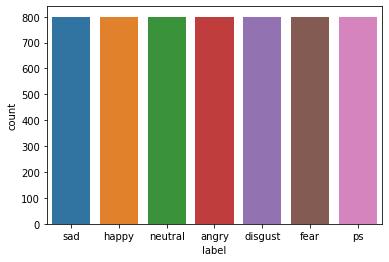

In [ ]:
sns.countplot(df['label'])

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

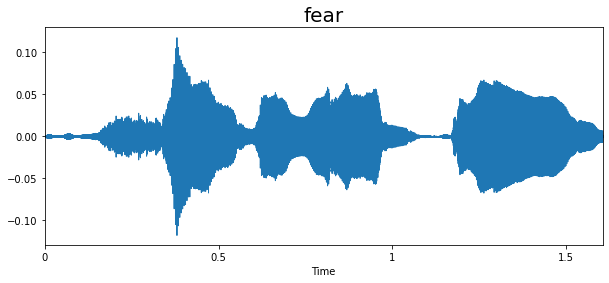

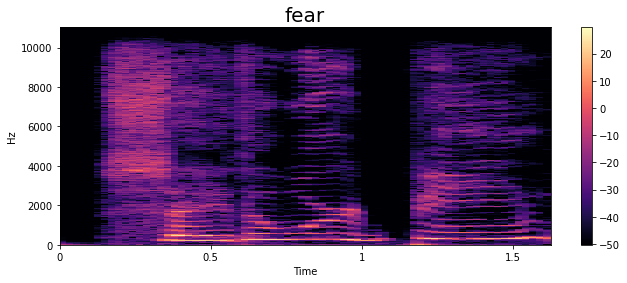

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


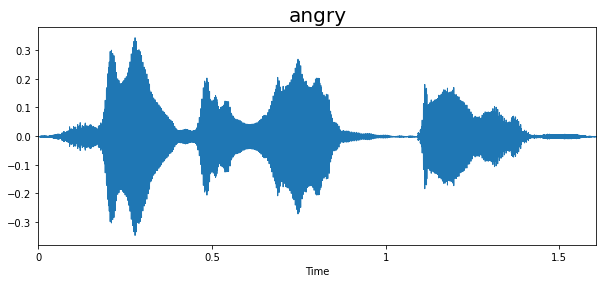

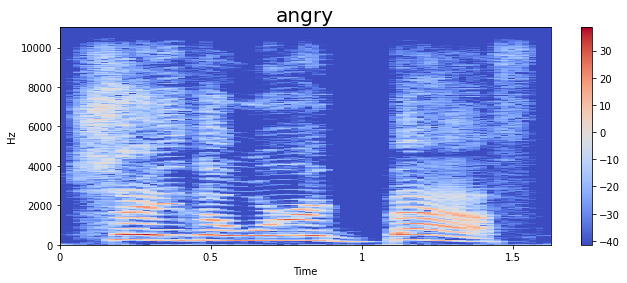

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

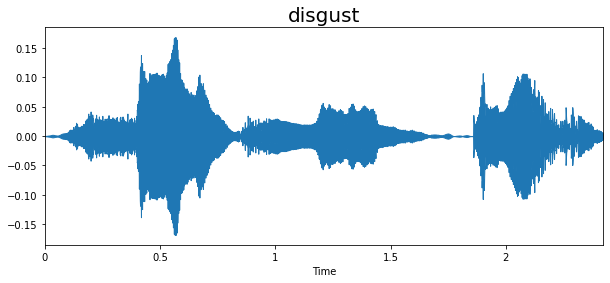

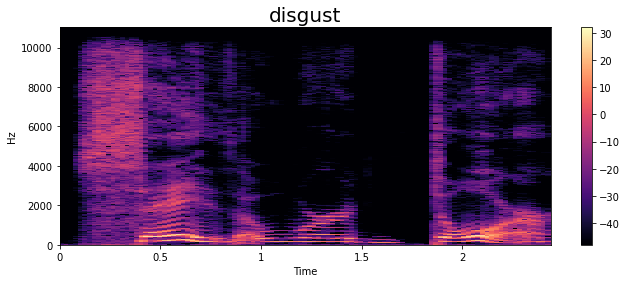

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

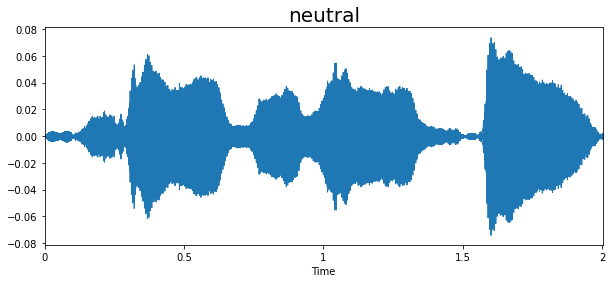

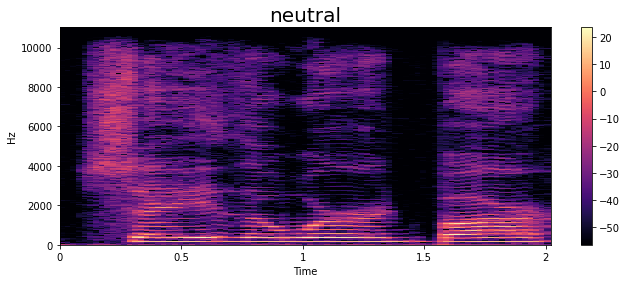

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

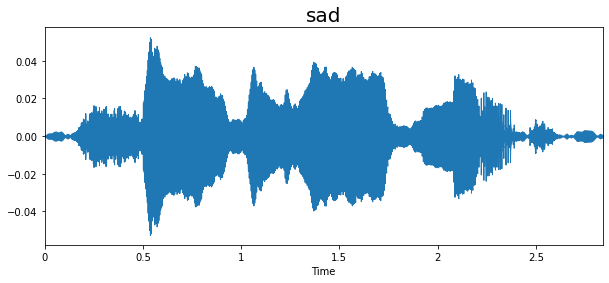

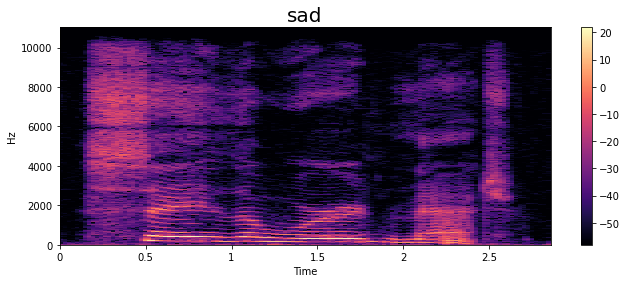

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

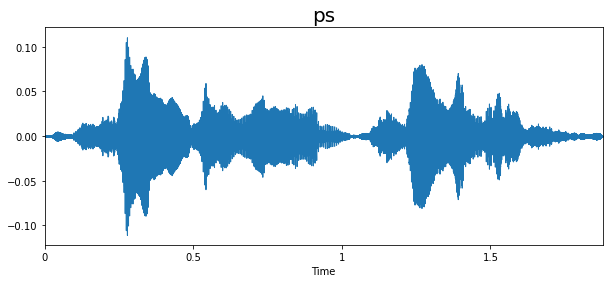

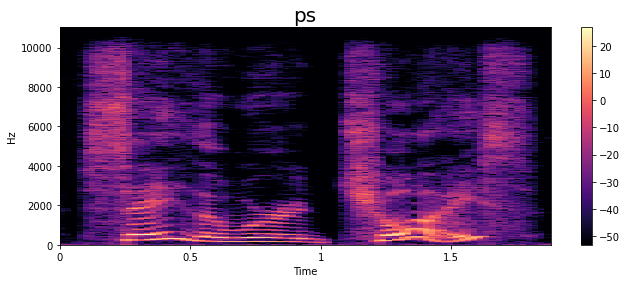

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

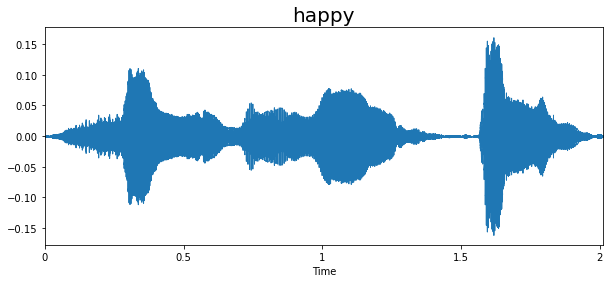

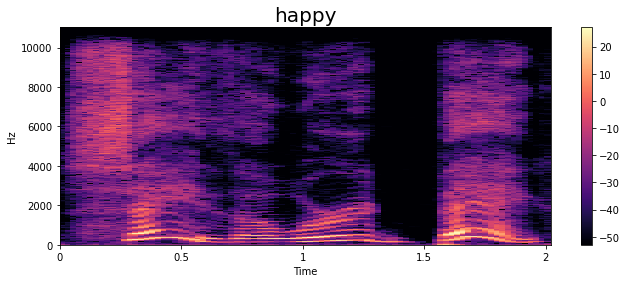

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

#Feature Extraction

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-5.41331970e+02,  9.99492264e+01,  1.91744957e+01,  1.28145018e+01,
        2.37855606e+01,  1.43438873e+01, -1.40387640e+01, -7.01845694e+00,
       -1.69410496e+01,  7.80669880e+00, -1.26852045e+01,  3.02674627e+00,
       -6.36653805e+00,  7.74448633e+00, -2.72178268e+00, -1.88276803e+00,
       -3.73935843e+00,  4.59976959e+00, -1.68448257e+00, -6.31824636e+00,
        5.34819126e+00, -2.78804332e-01, -1.00251281e+00, -1.42104638e+00,
       -8.44448853e+00,  3.87868929e+00, -3.21303320e+00,  5.34267247e-01,
        4.57649827e-01,  7.16918325e+00,  5.69587326e+00,  1.18383608e+01,
        6.21836948e+00,  9.35354996e+00,  2.32720184e+00,  3.64880371e+00,
        5.88400984e+00,  9.03068542e+00,  9.62857151e+00,  1.40240240e+01],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-541.332, 99.94923, 19.174496, 12.814502, 23....
1       [-528.1218, 91.064186, 27.860214, 15.587684, 1...
2       [-545.66754, 108.84384, 38.441185, 12.857641, ...
3       [-530.10913, 115.368835, 34.206337, 5.609689, ...
4       [-526.12805, 102.99938, 24.05479, 14.541901, 1...
                              ...                        
5595    [-347.62396, 40.62633, -8.361269, 37.963055, -...
5596    [-324.95752, 34.96247, -13.4050665, 33.948322,...
5597    [-338.45337, 60.3165, -21.225277, 37.73959, -1...
5598    [-374.37698, 37.55593, -10.917602, 38.94654, -...
5599    [-296.61078, 66.27277, -39.670235, 18.797558, ...
Name: speech, Length: 5600, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(5600, 7)

#Create the LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [ ]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
70/70 [==============================] - 7s 15ms/step - loss: 0.8734 - accuracy: 0.6616 - val_loss: 0.3232 - val_accuracy: 0.8313
Epoch 2/50
70/70 [==============================] - 0s 6ms/step - loss: 0.2572 - accuracy: 0.9165 - val_loss: 0.1105 - val_accuracy: 0.9625
Epoch 3/50
70/70 [==============================] - 0s 7ms/step - loss: 0.1990 - accuracy: 0.9377 - val_loss: 0.0676 - val_accuracy: 0.9759
Epoch 4/50
70/70 [==============================] - 0s 7ms/step - loss: 0.1286 - accuracy: 0.9614 - val_loss: 0.0664 - val_accuracy: 0.9759
Epoch 5/50
70/70 [==============================] - 0s 6ms/step - loss: 0.0947 - accuracy: 0.9712 - val_loss: 0.0915 - val_accuracy: 0.9705
Epoch 6/50
70/70 [==============================] - 0s 7ms/step - loss: 0.1231 - accuracy: 0.9627 - val_loss: 0.0218 - val_accuracy: 0.9911
Epoch 7/50
70/70 [==============================] - 0s 7ms/step - loss: 0.0905 - accuracy: 0.9725 - val_loss: 0.0598 - val_accuracy: 0.9804
Epoch 8/50
70/70 [=

In [ ]:
# best val accuracy: 72.32
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

#Plot the results

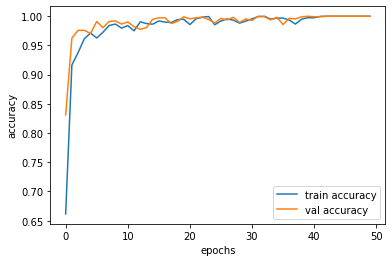

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

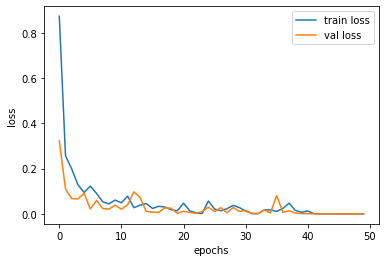

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()